# The fit from the rectified image has been warped back onto the original image and plotted to identify the lane boundaries. 

In [3]:
import cv2
import os
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import numpy as np
from Project2_1 import distortionCorrection, undistort
from Project2_2 import binaryImage
from Project2_3 import birdeye
from Lanes import LaneLine, getFitsByPreviousFits,\
    getFitsBySlidingWindows, drawBackOntoRoad, time_window
from Project2_FinalPart import laneDetection
import io
import base64
from IPython.display import HTML

Drwaing lane line in test images

In [4]:
ret, mtx, dist, rvecs, tvecs = distortionCorrection(calib_images_dir='camera_cal')


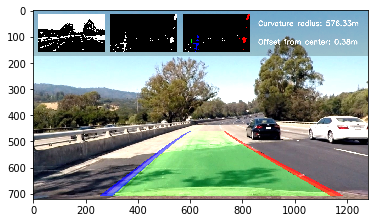

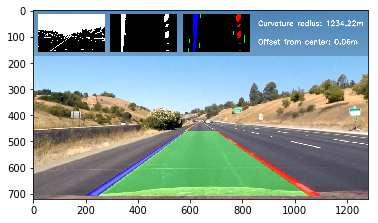

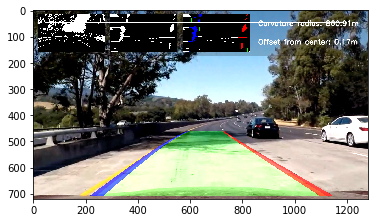

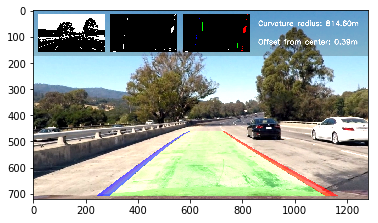

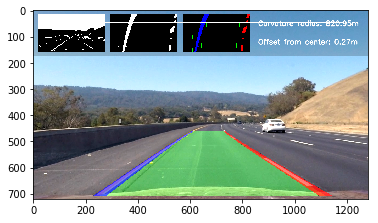

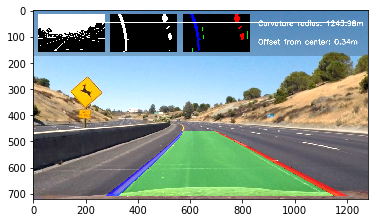

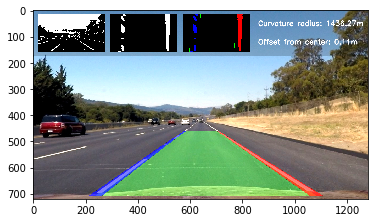

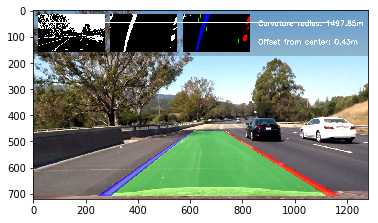

In [5]:
test_img_dir = 'test_images'

for test_img in os.listdir(test_img_dir):
    frame = cv2.imread(os.path.join(test_img_dir, test_img))
    blend = laneDetection(frame,mtx,dist,keep_state=False)
    cv2.imwrite('output_images/{}'.format(test_img), blend)
    plt.imshow(cv2.cvtColor(blend, code=cv2.COLOR_BGR2RGB))
    plt.show()

In [6]:
selector = 'project'
clip = VideoFileClip('{}_video.mp4'.format(selector)).fl_image(lambda image: laneDetection(image,mtx,dist,keep_state=True))
clip.write_videofile('out_{}_{}.mp4'.format(selector, time_window), audio=False)

[MoviePy] >>>> Building video out_project_10.mp4
[MoviePy] Writing video out_project_10.mp4


100%|█████████▉| 1260/1261 [09:58<00:00,  2.19it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: out_project_10.mp4 



In [8]:
video = io.open('out_project_10.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))